# Insurance Price Prediction

In [33]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [34]:
data=pd.read_csv('insurance.csv')

In [35]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [36]:
data.shape

(1338, 7)

In [37]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [38]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [39]:
data.children=data.children.astype('object')

In [40]:
data.dtypes

age           int64
sex          object
bmi         float64
children     object
smoker       object
region       object
expenses    float64
dtype: object

#### Checking for Null values 

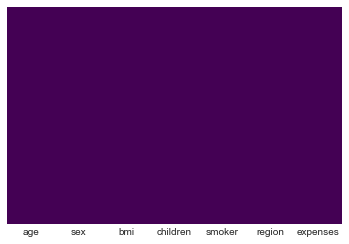

In [41]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')     #Using Seaborn heatmap

In [42]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### outlier Detection

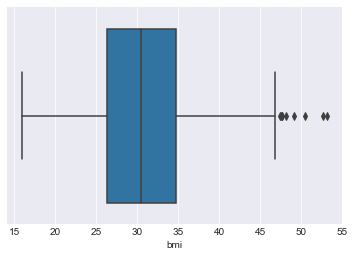

In [43]:
sns.boxplot(x=data['bmi'])                #Outliers in whole data

In [44]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age            24.0000
bmi             8.4000
expenses    11899.6275
dtype: float64


#### Corelation Plot


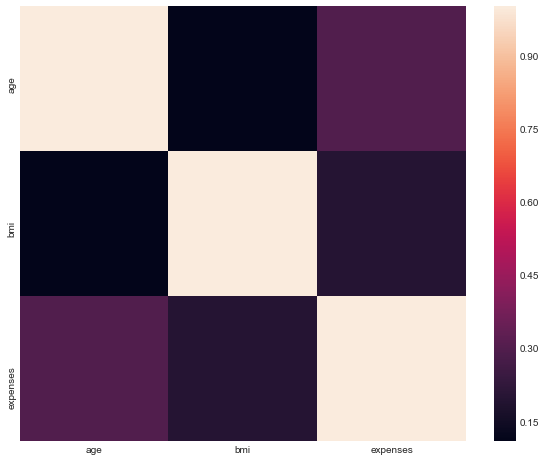

In [45]:
plt.figure(figsize=(10,8))                         
corr = data.corr()                         
sns.heatmap(corr)

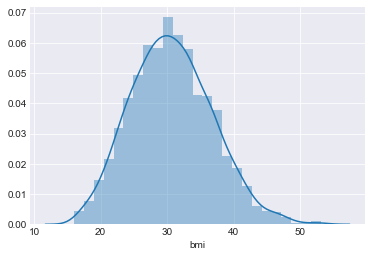

In [46]:
sns.set_style('darkgrid')
sns.distplot(data['bmi'])

In [47]:
dt=data   #Data backup

In [48]:
categorical_Attributes = data.select_dtypes(include=['object']).columns
print(categorical_Attributes )
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=True)
print (data.columns, data.shape)

Index(['sex', 'children', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'expenses', 'sex_male', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object') (1338, 13)


In [49]:
data.dtypes

age                   int64
bmi                 float64
expenses            float64
sex_male              uint8
children_1            uint8
children_2            uint8
children_3            uint8
children_4            uint8
children_5            uint8
smoker_yes            uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [50]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'bmi', 'expenses']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [51]:
y=data['expenses']
X=data.drop(['expenses'],axis=1)

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

In [54]:
reg.fit(X_train,y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [55]:
y_pred=reg.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [57]:
print(score)

0.8443143712327592


#### Error Metrics 

In [58]:
rf_train=reg.predict(X_train)
rf_test=reg.predict(X_test)

In [59]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


print("MAE")
print("Train : ",mean_absolute_error(y_train,rf_train))
print("Test  : ",mean_absolute_error(y_test,rf_test))


print("MSE")
print("Train : ",mean_squared_error(y_train,rf_train))
print("Test  : ",mean_squared_error(y_test,rf_test))




print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(y_train,rf_train)))
print("Test  : ",np.sqrt(mean_squared_error(y_test,rf_test)))


print("R^2")
print("Train : ",r2_score(y_train,rf_train))
print("Test  : ",r2_score(y_test,rf_test))




print("MAPE")
print("Train : ",np.mean(np.abs((y_train - rf_train) / y_train)) * 100)
print("Test  : ",np.mean(np.abs((y_test - rf_test) / y_test)) * 100)

MAE
Train :  0.09318657240027375
Test  :  0.24470301376455147
MSE
Train :  0.03607334344874124
Test  :  0.16941883007498937
RMSE
Train :  0.1899298382264915
Test  :  0.4116051871332398
R^2
Train :  0.9625049379920871
Test  :  0.8443143712327592
MAPE
Train :  36.161738319394736
Test  :  142.65918635171556


### Using XGBoost 

In [60]:
import xgboost
regressor=xgboost.XGBRegressor()

In [61]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [62]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [63]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [64]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   25.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   41.4s


[19:33:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [65]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [66]:
regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [67]:
regressor.fit(X_train,y_train)

[19:33:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [68]:
yy_pred=regressor.predict(X_test)

In [69]:
from sklearn.metrics import r2_score
score_xg=r2_score(y_test,yy_pred)

In [70]:
print("Random Forest Score:",score)
print("XGBoost Score:",score_xg)

Random Forest Score: 0.8443143712327592
XGBoost Score: 0.8896591419946038


In [71]:
train_predict= regressor.predict(X_train)
test_predict= regressor.predict(X_test)

In [72]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


print("MAE")
print("Train : ",mean_absolute_error(y_train,train_predict))
print("Test  : ",mean_absolute_error(y_test,test_predict))


print("MSE")
print("Train : ",mean_squared_error(y_train,train_predict))
print("Test  : ",mean_squared_error(y_test,test_predict))




print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(y_train,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(y_test,test_predict)))


print("R^2")
print("Train : ",r2_score(y_train,train_predict))
print("Test  : ",r2_score(y_test,test_predict))




print("MAPE")
print("Train : ",np.mean(np.abs((y_train - train_predict) / y_train)) * 100)
print("Test  : ",np.mean(np.abs((y_test - test_predict) / y_test)) * 100)

MAE
Train :  0.20334961319823308
Test  :  0.20913525052095297
MSE
Train :  0.128717847695366
Test  :  0.12007414698946371
RMSE
Train :  0.358772696418451
Test  :  0.34651716694770507
R^2
Train :  0.8662091389526787
Test  :  0.8896591419946038
MAPE
Train :  85.83315306248102
Test  :  99.23666129251681


## Decision tree

In [73]:
# set of parameters to test
param_grid = {"criterion":["mse","mae"],
              "min_samples_split": [10, 20],
              "max_depth": [None, 5, 10],
              "min_samples_leaf": [5, 10],
              "max_leaf_nodes": [10, 20],
              }

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeRegressor()


In [75]:
clf2 = GridSearchCV(dt, param_grid, cv=5)
clf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 5, 10], 'max_leaf_nodes': [10, 20],
                         'min_samples_leaf': [5, 10],
                       

In [76]:
clf2.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=20, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [77]:
train_dt_pred = clf2.predict(X_train)
test_dt_pred = clf2.predict(X_test)

In [78]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


print("MAE")
print("Train : ",mean_absolute_error(y_train,train_dt_pred))
print("Test  : ",mean_absolute_error(y_test,test_dt_pred))


print("MSE")
print("Train : ",mean_squared_error(y_train,train_dt_pred))
print("Test  : ",mean_squared_error(y_test,test_dt_pred))




print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(y_train,train_dt_pred)))
print("Test  : ",np.sqrt(mean_squared_error(y_test,test_dt_pred)))


print("R^2")
print("Train : ",r2_score(y_train,train_dt_pred))
print("Test  : ",r2_score(y_test,test_dt_pred))




print("MAPE")
print("Train : ",np.mean(np.abs((y_train - train_dt_pred) / y_train)) * 100)
print("Test  : ",np.mean(np.abs((y_test -test_dt_pred) / y_test)) * 100)

MAE
Train :  0.16619844574774825
Test  :  0.15835940003243423
MSE
Train :  0.15333810657028568
Test  :  0.12953602642861772
RMSE
Train :  0.39158409897528484
Test  :  0.3599111368499421
R^2
Train :  0.84061854920106
Test  :  0.8809642486987849
MAPE
Train :  61.52136780394131
Test  :  60.009358202668075


## Storing and Loading model from .pkl file

##### Since XGBoost has higher R2 score of 0.8896, hence it is choosen as best model for storing and loading from .pkl file

In [79]:
from sklearn.externals import joblib 

In [80]:
# Save the model as a pickle in a file 
joblib.dump(random_cv, 'filename.pkl') 

['filename.pkl']

In [81]:
# Load the model from the file 
xg_from_joblib = joblib.load('filename.pkl')

[19:33:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
# Use the loaded model to make predictions 
xg_from_joblib.fit(X_train,y_train)
xg_test=xg_from_joblib.predict(X_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   29.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   45.3s


[19:34:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.2min finished


In [83]:
xg_train=xg_from_joblib.predict(X_train)

In [84]:
# Print various metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


print("MAE")
print("Train : ",mean_absolute_error(y_train,xg_train))
print("Test  : ",mean_absolute_error(y_test,xg_test))


print("MSE")
print("Train : ",mean_squared_error(y_train,xg_train))
print("Test  : ",mean_squared_error(y_test,xg_test))




print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(y_train,xg_train)))
print("Test  : ",np.sqrt(mean_squared_error(y_test,xg_test)))


print("R^2")
print("Train : ",r2_score(y_train,xg_train))
print("Test  : ",r2_score(y_test,xg_test))




print("MAPE")
print("Train : ",np.mean(np.abs((y_train - xg_train) / y_train)) * 100)
print("Test  : ",np.mean(np.abs((y_test -xg_test) / y_test)) * 100)

MAE
Train :  0.20334961319823308
Test  :  0.20913525052095297
MSE
Train :  0.128717847695366
Test  :  0.12007414698946371
RMSE
Train :  0.358772696418451
Test  :  0.34651716694770507
R^2
Train :  0.8662091389526787
Test  :  0.8896591419946038
MAPE
Train :  85.83315306248102
Test  :  99.23666129251681
